In [1]:
!pip install healpy

  Using cached healpy-1.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached healpy-1.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.9 MB)


In [2]:
import xarray as xr

xr.set_options(display_max_rows=27)
import fsspec
import numpy as np

url = "https://data-fair2adapt.ifremer.fr/odysea/odysea/L2_global_mitgcm_confF_c13/odysea_L2_global_mitgcm_confF_c13_p176.nc"
fs = fsspec.filesystem("http")
ds = xr.open_dataset(fs.open(url), engine="h5netcdf")
print(ds)

<xarray.Dataset> Size: 120MB
Dimensions:               (along_track: 3858, cross_track: 298)
Coordinates:
  * along_track           (along_track) int64 31kB 0 1 2 3 ... 3855 3856 3857
  * cross_track           (cross_track) int64 2kB 0 1 2 3 4 ... 294 295 296 297
Data variables:
    sample_time           (along_track, cross_track) datetime64[ns] 9MB ...
    lat                   (along_track, cross_track) float32 5MB ...
    lon                   (along_track, cross_track) float32 5MB ...
    swath_blanking        (cross_track) bool 298B ...
    encoder_fore          (along_track, cross_track) float32 5MB ...
    encoder_aft           (along_track, cross_track) float32 5MB ...
    azimuth_fore          (along_track, cross_track) float32 5MB ...
    azimuth_aft           (along_track, cross_track) float32 5MB ...
    bearing               (along_track) float32 15kB ...
    u_model               (along_track, cross_track) float32 5MB ...
    v_model               (along_track, cross_trac

In [3]:

ds

<xarray.Dataset> Size: 120MB
Dimensions:               (along_track: 3858, cross_track: 298)
Coordinates:
  * along_track           (along_track) int64 31kB 0 1 2 3 ... 3855 3856 3857
  * cross_track           (cross_track) int64 2kB 0 1 2 3 4 ... 294 295 296 297
Data variables:
    sample_time           (along_track, cross_track) datetime64[ns] 9MB ...
    lat                   (along_track, cross_track) float32 5MB ...
    lon                   (along_track, cross_track) float32 5MB ...
    swath_blanking        (cross_track) bool 298B ...
    encoder_fore          (along_track, cross_track) float32 5MB ...
    encoder_aft           (along_track, cross_track) float32 5MB ...
    azimuth_fore          (along_track, cross_track) float32 5MB ...
    azimuth_aft           (along_track, cross_track) float32 5MB ...
    bearing               (along_track) float32 15kB ...
    u_model               (along_track, cross_track) float32 5MB ...
    v_model               (along_track, cross_track) float32 5MB ...
    ur_nonoise_fore       (along_track, cross_track) float32 5MB ...
    ur_nonoise_aft        (along_track, cross_track) float32 5MB ...
    radial_angle_fore     (along_track, cross_track) float32 5MB ...
    radial_angle_aft      (along_track, cross_track) float32 5MB ...
    ur_fore               (along_track, cross_track) float32 5MB ...
    ur_aft                (along_track, cross_track) float32 5MB ...
    wind_speed            (along_track, cross_track) float32 5MB ...
    wind_dir              (along_track, cross_track) float32 5MB ...
    ur_northward          (along_track, cross_track) float32 5MB ...
    ur_eastward           (along_track, cross_track) float32 5MB ...
    ur_nonoise_northward  (along_track, cross_track) float32 5MB ...
    ur_nonoise_eastward   (along_track, cross_track) float32 5MB ...
    ur_ac                 (along_track, cross_track) float32 5MB ...
    ur_al                 (along_track, cross_track) float32 5MB ...
    ur_nonoise_ac         (along_track, cross_track) float32 5MB ...
    ur_nonoise_al         (along_track, cross_track) float32 5MB ...
Attributes:
    title:                Odysea Simple Orbit Sampling V0.1
    project:              Odysea
    summary:              Simplified orbit sampling assuming basic Odysea orb...
    references:           Rodriguez 2018, Wineteer 2020
    institution:          Jet Propulsion Laboratory (JPL)
    creator_name:         Alexander Wineteer
    version_id:           0.1
    date_created:         2024-07-19 23:16:49.501581
    geospatial_lat_min:   -89.99N
    geospatial_lat_max:   89.99N
    geospatial_lon_min:   -180.00E
    geospatial_lon_max:   180.00E
    time_coverage_start:  2020-05-26 05:29:59.938275
    time_coverage_end:    2020-05-26 06:16:00.065663

In [4]:
import healpy as hp

In [13]:

nside=256

hidx=hp.ang2pix(nside,ds.lon.data,ds.lat.data,lonlat=True,nest=True).flatten()
umap  = np.bincount(hidx,weights=ds.u_model.values.flatten(),minlength=12*nside**2)
vmap  = np.bincount(hidx,weights=ds.v_model.values.flatten(),minlength=12*nside**2)
him = np.bincount(hidx,minlength=12*nside**2)

umap[him>0]=umap[him>0]/him[him>0]
vmap[him>0]=vmap[him>0]/him[him>0]

umap[him==0]=hp.UNSEEN
vmap[him==0]=hp.UNSEEN

for k in range(0):
    l_nside = nside//2**(k+1)
    l_scale = 4**(k++1)
    print(l_nside)
    hidx=hp.ang2pix(l_nside,ds.lon.data,ds.lat.data,lonlat=True,nest=True)
    l_umap  = np.bincount(hidx.flatten(),weights=ds.u_model.values.flatten(),minlength=12*l_nside**2)
    l_vmap  = np.bincount(hidx.flatten(),weights=ds.v_model.values.flatten(),minlength=12*l_nside**2)
    him = np.bincount(hidx.flatten(),minlength=12*l_nside**2)

    l_umap[him>0]=l_umap[him>0]/him[him>0]
    l_vmap[him>0]=l_vmap[him>0]/him[him>0]

    l_idx=np.where(him>0)[0]
    
    l_idx=l_scale*np.repeat(l_idx,l_scale)+np.tile(np.arange(l_scale),l_idx.shape[0])
    
    idx=np.where(umap[l_idx]==hp.UNSEEN)[0]
    
    umap[l_idx[idx]]=l_umap[l_idx[idx]//(l_scale)]
    vmap[l_idx[idx]]=l_vmap[l_idx[idx]//(l_scale)]

In [14]:
np.isnan(umap).sum()

8384

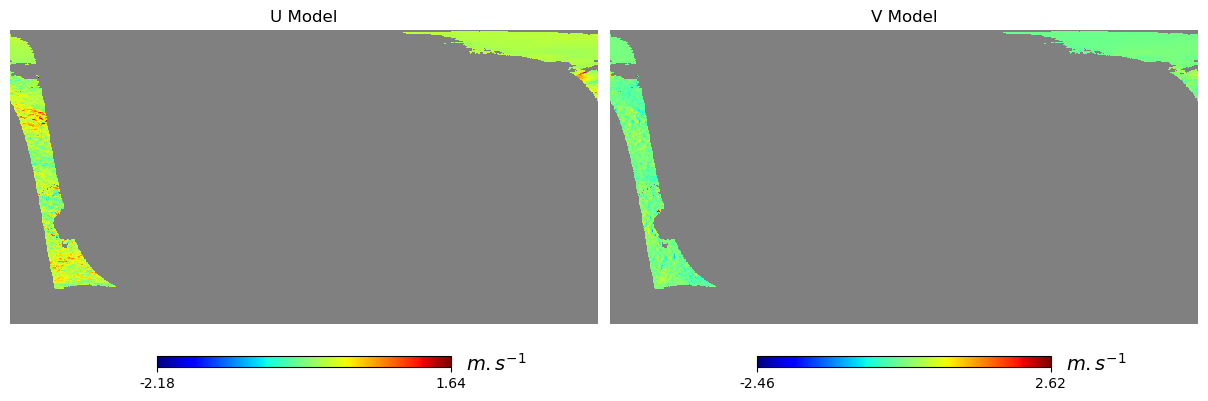

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
hp.cartview(umap,nest=True,hold=False,sub=(1,2,1),title='U Model',unit=r'$m.s^{-1}$',cmap='jet')
hp.cartview(vmap,nest=True,hold=False,sub=(1,2,2),title='V Model',unit=r'$m.s^{-1}$',cmap='jet')

In [10]:
e,b=hp.map2alm_spin([umap,vmap],spin=1)

array([ 0. +0.j, nan +0.j, nan +0.j, ..., nan+nanj, nan+nanj, nan+nanj])

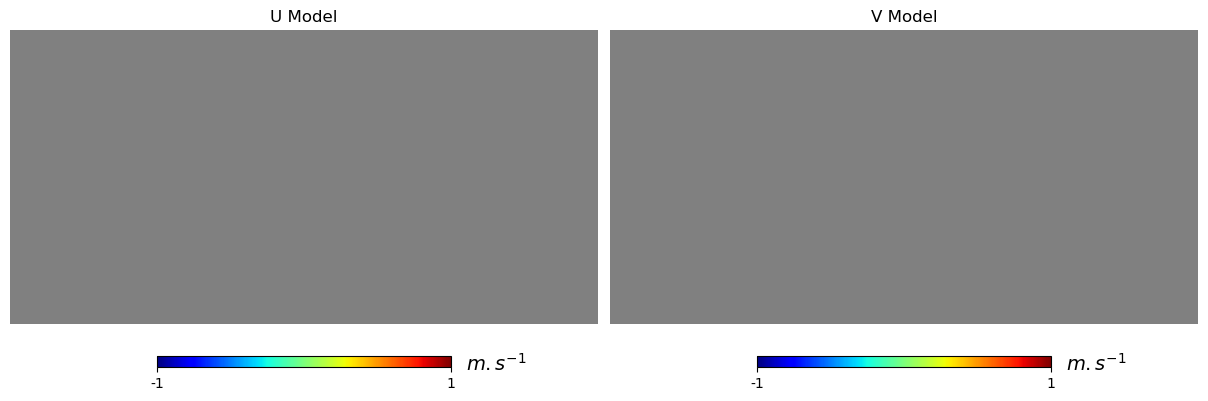

In [9]:
plt.figure(figsize=(12,4))
hp.cartview(hp.alm2map(e,nside),nest=True,hold=False,sub=(1,2,1),title='U Model',unit=r'$m.s^{-1}$',cmap='jet')
hp.cartview(hp.alm2map(b,nside),nest=True,hold=False,sub=(1,2,2),title='V Model',unit=r'$m.s^{-1}$',cmap='jet')